# Дослідження та візуалізація даних за допомогою Python
**Мета**: отримати базові навики використання Python для дослідження та
візуалізації даних.

In [71]:
N = ord("Y") % 3 + 1
print("Variant", N)

Variant 3


In [72]:
import csv
import numpy as np

def getColumnData(columnName):
  array = []
  with open('russia_losses_equipment.csv', mode ='r') as file:
    csvFile = csv.reader(file)
    columnNames = next(csvFile)
    for lines in csvFile:
      array.append(lines[columnNames.index(columnName)])
    return array

Знайдіть добові втрати БТР

In [73]:
def dailyLosses():
  apc = np.array(getColumnData('APC'), dtype=np.int32)
  result = np.diff(apc[::-1])
  return result[::-1]

In [74]:
dailyLosses()


array([ 52,  38,  39,  13,   3,   6,   8,  20,  40,  48,  17,  13,  19,
         9,  19,   0,   9,  21,  27,  35,  26,  24,  14,  23,  18,  14,
        19,  17,  11,  21,  32,  25,  21,  26,  15,   7,  12,  35,  24,
        17,  17,   5,  13,   9,   9,   9,  29,   8,  31,  17,  27,   8,
        42,  20,  38,   8,  21,  24,  11,  26,  13,  20,  17,  46,  15,
        19,  12,   9,  36,  15,  32,  24,  23,  17,  11,  19,  40,  16,
        18,  11,  17,  17,  16,  26,  19,  25,  21,   9,  19,  18,  15,
        15,  11,  35,  18,  12,  20,  18,   6,  29,  26,  21,  11,  32,
        13,  26,   9,  20,  40,  16,  18,  22,  33,  12,  22,  22,  33,
        40,  15,  17,  11,  27,  27,  22,  34,  35,  35,  43,  14,  30,
        48,  43,  42,  22,  40,  32,  35,  19,  14,  34,  23,  27,  33,
        29,  21,  39,  16,  20,  14,  15,  14,  12,  12,   8,  23,  21,
        17,   8,  18,  13,  31,  20,  47,  19,  12,  47,  45,  24,  54,
        38,  73,  18,  18,  29,  17,  20,  20,  27,  21,   9,  2

Знайдіть 5 найбільших добових втрат БТР

In [75]:
def maxDailyLosses():
  losses = dailyLosses()
  sortedArr = np.sort(dailyLosses())
  result = sortedArr[-5:]
  return result[::-1]

In [76]:
print(maxDailyLosses())

[190 120 110  96  91]


Визначте, скільки БТР було знищено влітку 2023 року

In [77]:
def summerLossesAPC():
  dateArr = np.array(getColumnData('date'))
  apc = np.array(getColumnData('APC'), dtype=np.int32)
  dateAPC = dict(zip(dateArr, apc))
  summerData = {k: v for k, v in dateAPC.items() if '2023-05-31' < k < '2023-09-01'}
  summerValues = np.array(list(summerData.values()))
  result = np.diff(summerValues[::-1])
  return np.sum(result)

In [78]:
summerLossesAPC()

1126

Знайдіть середнє значення знищених БТР за 100-500 днів війни

In [79]:
def avgLossesAPC():
  losses = dailyLosses()
  result = np.sum(losses[:400])/400
  return result

In [80]:
avgLossesAPC()

21.995

Створіть графік втрат БТР за останні 200 днів (починаючи з останньої
дати в наборі даних)

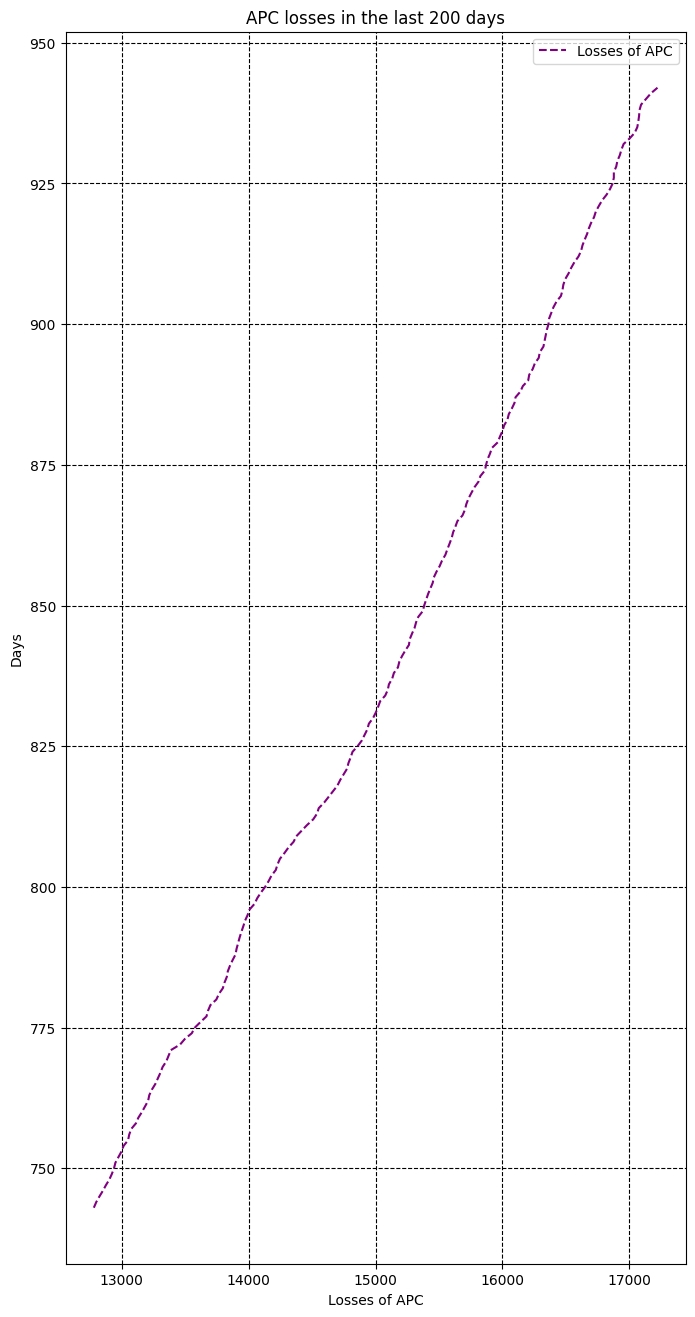

In [81]:
import matplotlib.pyplot as plt

apc = np.array(getColumnData('APC'), dtype=np.int32)
lastLosses = apc[:200]

xpoints = lastLosses[::-1]
ypoints = np.arange(743, 943)

plt.figure(figsize=(8, 16))
plt.plot(xpoints, ypoints, linestyle = 'dashed', color = 'purple', label='Losses of APC')

plt.title("APC losses in the last 200 days")
plt.xlabel("Losses of APC")
plt.ylabel("Days")

plt.grid(color = 'black', linestyle = '--')

plt.legend()
plt.savefig('plot.png', dpi=100)

plt.show()